In [28]:


import pandas as pd
import numpy as np



import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

sns.set(color_codes=True)



from datetime import datetime



import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [29]:
eda_data = pd.read_csv('/kaggle/input/clean-data/clean_data_after_eda.csv')
eda_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


In [30]:
eda_data["date_activ"] = pd.to_datetime(eda_data["date_activ"], format='%Y-%m-%d')
eda_data["date_end"] = pd.to_datetime(eda_data["date_end"], format='%Y-%m-%d')
eda_data["date_modif_prod"] = pd.to_datetime(eda_data["date_modif_prod"], format='%Y-%m-%d')
eda_data["date_renewal"] = pd.to_datetime(eda_data["date_renewal"], format='%Y-%m-%d')

eda_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


Feature Engineering
The difference between off-peak prices in December and preceding January the preceding year.

In [31]:
price_data = pd.read_csv('/kaggle/input/bcg-task2/price_data (1).csv')
price_data["price_date"] = pd.to_datetime(price_data["price_date"], format='%Y-%m-%d')
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [32]:

monthly_price_by_id = price_data.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 
                                                                    'price_off_peak_fix': 'mean'}).reset_index()

jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()


diff = pd.merge(

    dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), 
    jan_prices.drop(columns='price_date'), on='id'
)
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]

diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [33]:
print(eda_data.columns)
print(diff.columns)

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fix', 'var_6m_p

In [ ]:
eda_data.rename(columns={'old_id_name': 'id'}, inplace=True)
diff.rename(columns={'old_id_name': 'id'}, inplace=True)

In [ ]:
eda_data = pd.merge(eda_data, diff, on='id')
eda_data.head()

Average price changes as time passes
By computing the average price changes over certain time periods rather than the entire year, we can now improve the feature that our colleague created

In [35]:

mean_prices = price_data.groupby(['id']).agg({'price_off_peak_var': 'mean', 'price_peak_var': 'mean', 
                                              'price_mid_peak_var': 'mean', 'price_off_peak_fix': 'mean', 
                                              'price_peak_fix': 'mean', 'price_mid_peak_fix': 'mean'}).reset_index()

In [36]:

mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [37]:
columns = ['id', 'off_peak_peak_var_mean_diff', 'peak_mid_peak_var_mean_diff', 'off_peak_mid_peak_var_mean_diff', 
           'off_peak_peak_fix_mean_diff', 'peak_mid_peak_fix_mean_diff', 'off_peak_mid_peak_fix_mean_diff']

eda_data = pd.merge(eda_data, mean_prices[columns], on='id')
eda_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,2.086425,9.953056e+01,4.423670e+01,1,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.009485,1.217891e-03,0.000000e+00,0,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


•♦• This feature may be helpful because it enhances the already useful functionality that my colleague found by adding more granularity. We now have features that look at mean average price disparities across various time periods rather than differences over the course of a year (off_peak, peak, mid_peak). While inter-time-period features may reveal patterns on a micro scale between months, the Dec-Jan feature may indicate macro trends that happen over the course of an entire year.

Max price changes across periods and months
Looking at the largest price variation between periods and months is another method we can improve the functionality from our colleague.

In [38]:

mean_prices_by_month = price_data.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 
                                                                     'price_peak_var': 'mean', 
                                                                     'price_mid_peak_var': 'mean', 
                                                                     'price_off_peak_fix': 'mean', 
                                                                     'price_peak_fix': 'mean', 
                                                                     'price_mid_peak_fix': 'mean'}).reset_index()

In [39]:

mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [40]:

max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [41]:
columns = ['id', 'off_peak_peak_var_max_monthly_diff', 'peak_mid_peak_var_max_monthly_diff', 
           'off_peak_mid_peak_var_max_monthly_diff', 'off_peak_peak_fix_max_monthly_diff', 
           'peak_mid_peak_fix_max_monthly_diff', 'off_peak_mid_peak_fix_max_monthly_diff']

eda_data = pd.merge(eda_data, max_diff_across_periods_months[columns], on='id')
eda_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.058257,18.590255,7.450670,26.040925,0.060550,0.085483,0.146033,44.266930,8.145775,44.26693
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.149609,44.311375,0.000000,44.311375,0.151367,0.085483,0.151367,44.444710,0.000000,44.44471
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.170512,44.385450,0.000000,44.385450,0.084587,0.089162,0.172468,44.444710,0.000000,44.44471
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.151210,44.400265,0.000000,44.400265,0.153133,0.000000,0.153133,44.444710,0.000000,44.44471
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.051309,16.275263,8.137629,24.412893,0.022225,0.033743,0.055866,16.291555,8.145775,24.43733


 In an effort to consider the viewpoint of a PowerCo client, I believed that calculating the maximum price change across months and time periods would be a useful feature to develop. Nothing irritates me more as a utility customer than unexpected price changes between months, and a significant price increase within a short period of time would prompt me to shop around for a better deal with other utilities providers. For this use case, we are attempting to predict churn, thus I thought it would be interesting to integrate this feature.

BONUS - Feature Engineering
Tenure
    How long a company has been a client of PowerCo.

In [43]:
# Calculate tenure in years
eda_data['tenure'] = ((eda_data['date_end'] - eda_data['date_activ']).dt.total_seconds() / (365.25 * 24 * 60 * 60)).astype(int)

# Display the first 5 rows of the DataFrame
eda_data.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,18.590255,7.450670,26.040925,0.060550,0.085483,0.146033,44.266930,8.145775,44.26693,3
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,44.311375,0.000000,44.311375,0.151367,0.085483,0.151367,44.444710,0.000000,44.44471,7
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,44.385450,0.000000,44.385450,0.084587,0.089162,0.172468,44.444710,0.000000,44.44471,6
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,44.400265,0.000000,44.400265,0.153133,0.000000,0.153133,44.444710,0.000000,44.44471,6
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,16.275263,8.137629,24.412893,0.022225,0.033743,0.055866,16.291555,8.145775,24.43733,6


In [44]:
eda_data.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

,churn
tenure,
3,0.143713
2,0.133080
4,0.125756
13,0.095238
5,0.085425
12,0.083333
6,0.080713
7,0.073394
11,0.063584


As we can see, clients who have just been with us for four months or less are significantly more likely to leave than those who have been with us for longer. Intriguingly, compared to other variances between ordered tenure values, the difference between 4 and 5 months is around 4%, which signifies a significant increase in the risk that a client will leave. This may indicate that keeping a customer through the 4-month mark is actually a significant accomplishment in terms of retaining them as a long-term customer.

•♦• This is an interesting feature to keep for modelling because clearly how long you've been a client, has a influence on the chance of a client churning.

Transforming dates into months
♦ months_activ = Number of months active until reference date (Jan 2016)
♦ months_to_end = Number of months of the contract left until reference date (Jan 2016)
♦ months_modif_prod = Number of months since last modification until reference date (Jan 2016)
♦ months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [45]:
def convert_months(reference_date, eda_data, column):
    time_delta = reference_date - eda_data[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [47]:
import pandas as pd
import numpy as np
from datetime import datetime

def convert_months(reference_date, df, column):

    time_delta = reference_date - df[column]
    months = time_delta.apply(lambda x: (x.days // 30))
    return months


reference_date = datetime(2016, 1, 1)


eda_data['months_activ'] = convert_months(reference_date, eda_data, 'date_activ')
eda_data['months_to_end'] = -convert_months(reference_date, eda_data, 'date_end')
eda_data['months_modif_prod'] = convert_months(reference_date, eda_data, 'date_modif_prod')
eda_data['months_renewal'] = convert_months(reference_date, eda_data, 'date_renewal')


eda_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.085483,0.146033,44.266930,8.145775,44.26693,3,31,6,2,6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.085483,0.151367,44.444710,0.000000,44.44471,7,77,9,77,4
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.089162,0.172468,44.444710,0.000000,44.44471,6,69,4,69,8
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0.153133,44.444710,0.000000,44.44471,6,70,3,70,9
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.033743,0.055866,16.291555,8.145775,24.43733,6,72,3,72,9


In [48]:


remove = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

eda_data = eda_data.drop(columns=remove)
eda_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,0.085483,0.146033,44.266930,8.145775,44.26693,3,31,6,2,6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,0.085483,0.151367,44.444710,0.000000,44.44471,7,77,9,77,4
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,0.089162,0.172468,44.444710,0.000000,44.44471,6,69,4,69,8
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0.000000,0.153133,44.444710,0.000000,44.44471,6,70,3,70,9
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,0.033743,0.055866,16.291555,8.145775,24.43733,6,72,3,72,9


In [49]:
eda_data['has_gas'] = eda_data['has_gas'].replace(['t', 'f'], [1, 0])
eda_data.groupby(['has_gas']).agg({'churn': 'mean'})

,churn
has_gas,
0,0.100544
1,0.081856


In [50]:

eda_data['channel_sales'] = eda_data['channel_sales'].astype('category')

print("\n ----- Value Counts of Channel Sales ----- \n")
eda_data['channel_sales'].value_counts()


 ----- Value Counts of Channel Sales ----- 



channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

In [51]:
eda_data = pd.get_dummies(eda_data, columns=['channel_sales'], prefix='channel')
eda_data = eda_data.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 
                                  'channel_epumfxlbckeskwekxbiuasklxalciiuu', 
                                  'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
eda_data.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,3,31,6,2,6,False,False,True,False,False
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,7,77,9,77,4,True,False,False,False,False
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,6,69,4,69,8,False,False,True,False,False
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,6,70,3,70,9,False,False,False,True,False
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,6,72,3,72,9,True,False,False,False,False


In [52]:

eda_data['origin_up'] = eda_data['origin_up'].astype('category')


print("\n ----- Value Counts of Origin Up ----- \n")
eda_data['origin_up'].value_counts()


 ----- Value Counts of Origin Up ----- 



origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

In [53]:
eda_data = pd.get_dummies(eda_data, columns=['origin_up'], prefix='origin_up')
eda_data = eda_data.drop(columns=['origin_up_MISSING', 
                      'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 
                      'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
eda_data.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,2,6,False,False,True,False,False,False,False,True
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,77,4,True,False,False,False,False,True,False,False
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,69,8,False,False,True,False,False,True,False,False
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,70,9,False,False,False,True,False,True,False,False
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,72,9,True,False,False,False,False,True,False,False


In [54]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

print("\n ----- Statistical Summary of Skewed ----- \n")
eda_data[skewed].describe().T


 ----- Statistical Summary of Skewed ----- 



,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


In [55]:
### Applying log10 transformation

eda_data["cons_12m"] = np.log10(eda_data["cons_12m"] + 1)
eda_data["cons_gas_12m"] = np.log10(eda_data["cons_gas_12m"] + 1)
eda_data["cons_last_month"] = np.log10(eda_data["cons_last_month"] + 1)
eda_data["forecast_cons_12m"] = np.log10(eda_data["forecast_cons_12m"] + 1)
eda_data["forecast_cons_year"] = np.log10(eda_data["forecast_cons_year"] + 1)
eda_data["forecast_meter_rent_12m"] = np.log10(eda_data["forecast_meter_rent_12m"] + 1)
eda_data["imp_cons"] = np.log10(eda_data["imp_cons"] + 1)

In [56]:
print("\n ----- Statistical Summary of Skewed ----- \n")
eda_data[skewed].describe().T


 ----- Statistical Summary of Skewed ----- 



,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,4.223939,0.884515,0.0,3.754023,4.149727,4.610285,6.792889
cons_gas_12m,14606.0,0.779244,1.717071,0.0,0.000000,0.000000,0.000000,6.618528
cons_last_month,14606.0,2.264646,1.769305,0.0,0.000000,2.899547,3.529430,5.887169
forecast_cons_12m,14606.0,2.962177,0.683592,0.0,2.695477,3.046836,3.380716,4.918575
forecast_cons_year,14606.0,1.784610,1.584986,0.0,0.000000,2.498311,3.242231,5.243970
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,30.000000
forecast_meter_rent_12m,14606.0,1.517203,0.571481,0.0,1.235023,1.296555,2.120673,2.778376
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,0.273963
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,0.195975
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,59.266378


/tmp/ipykernel_33/1456254972.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((eda_data["cons_12m"].dropna()), ax=axs[0], color='g')
/tmp/ipykernel_33/1456254972.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((eda_data[eda_data["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1], color='

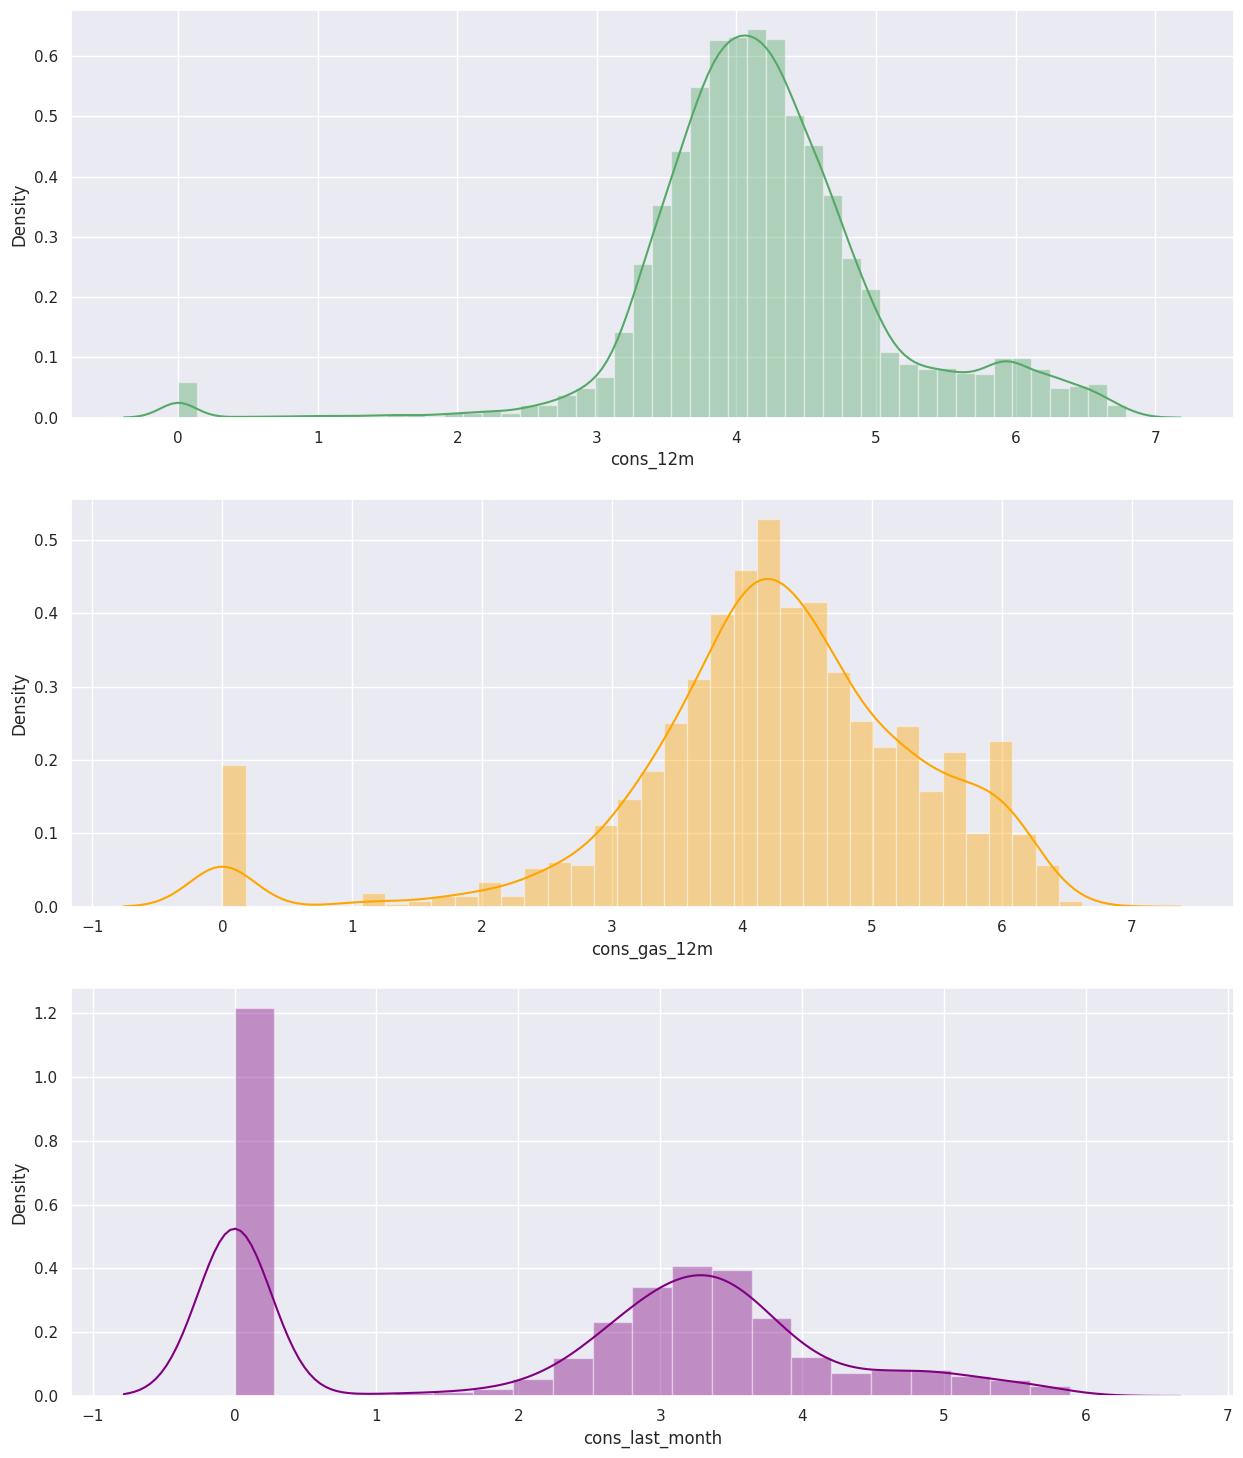

In [57]:
fig, axs = plt.subplots(nrows=3, figsize=(15, 18))
# Plot histograms
sns.distplot((eda_data["cons_12m"].dropna()), ax=axs[0], color='g')
sns.distplot((eda_data[eda_data["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1], color='orange')
sns.distplot((eda_data["cons_last_month"].dropna()), ax=axs[2], color='purple')

plt.show()

In [59]:

print(eda_data.dtypes)

non_numeric_columns = eda_data.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns:", non_numeric_columns)




eda_data_numeric = eda_data.drop(columns=non_numeric_columns)


correlation = eda_data_numeric.corr()


print(correlation)

id                                             object
cons_12m                                      float64
cons_gas_12m                                  float64
cons_last_month                               float64
forecast_cons_12m                             float64
                                               ...   
channel_lmkebamcaaclubfxadlmueccxoimlema         bool
channel_usilxuppasemubllopkaafesmlibmsdf         bool
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws       bool
origin_up_ldkssxwpmemidmecebumciepifcamkci       bool
origin_up_lxidpiddsbxsbosboudacockeimpuepw       bool
Length: 63, dtype: object
Non-numeric columns: ['id', 'channel_MISSING', 'channel_ewpakwlliwisiwduibdlfmalxowmwpci', 'channel_foosdfpfkusacimwkcsosbicdxkicaua', 'channel_lmkebamcaaclubfxadlmueccxoimlema', 'channel_usilxuppasemubllopkaafesmlibmsdf', 'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws', 'origin_up_ldkssxwpmemidmecebumciepifcamkci', 'origin_up_lxidpiddsbxsbosboudacockeimpuepw']
                   

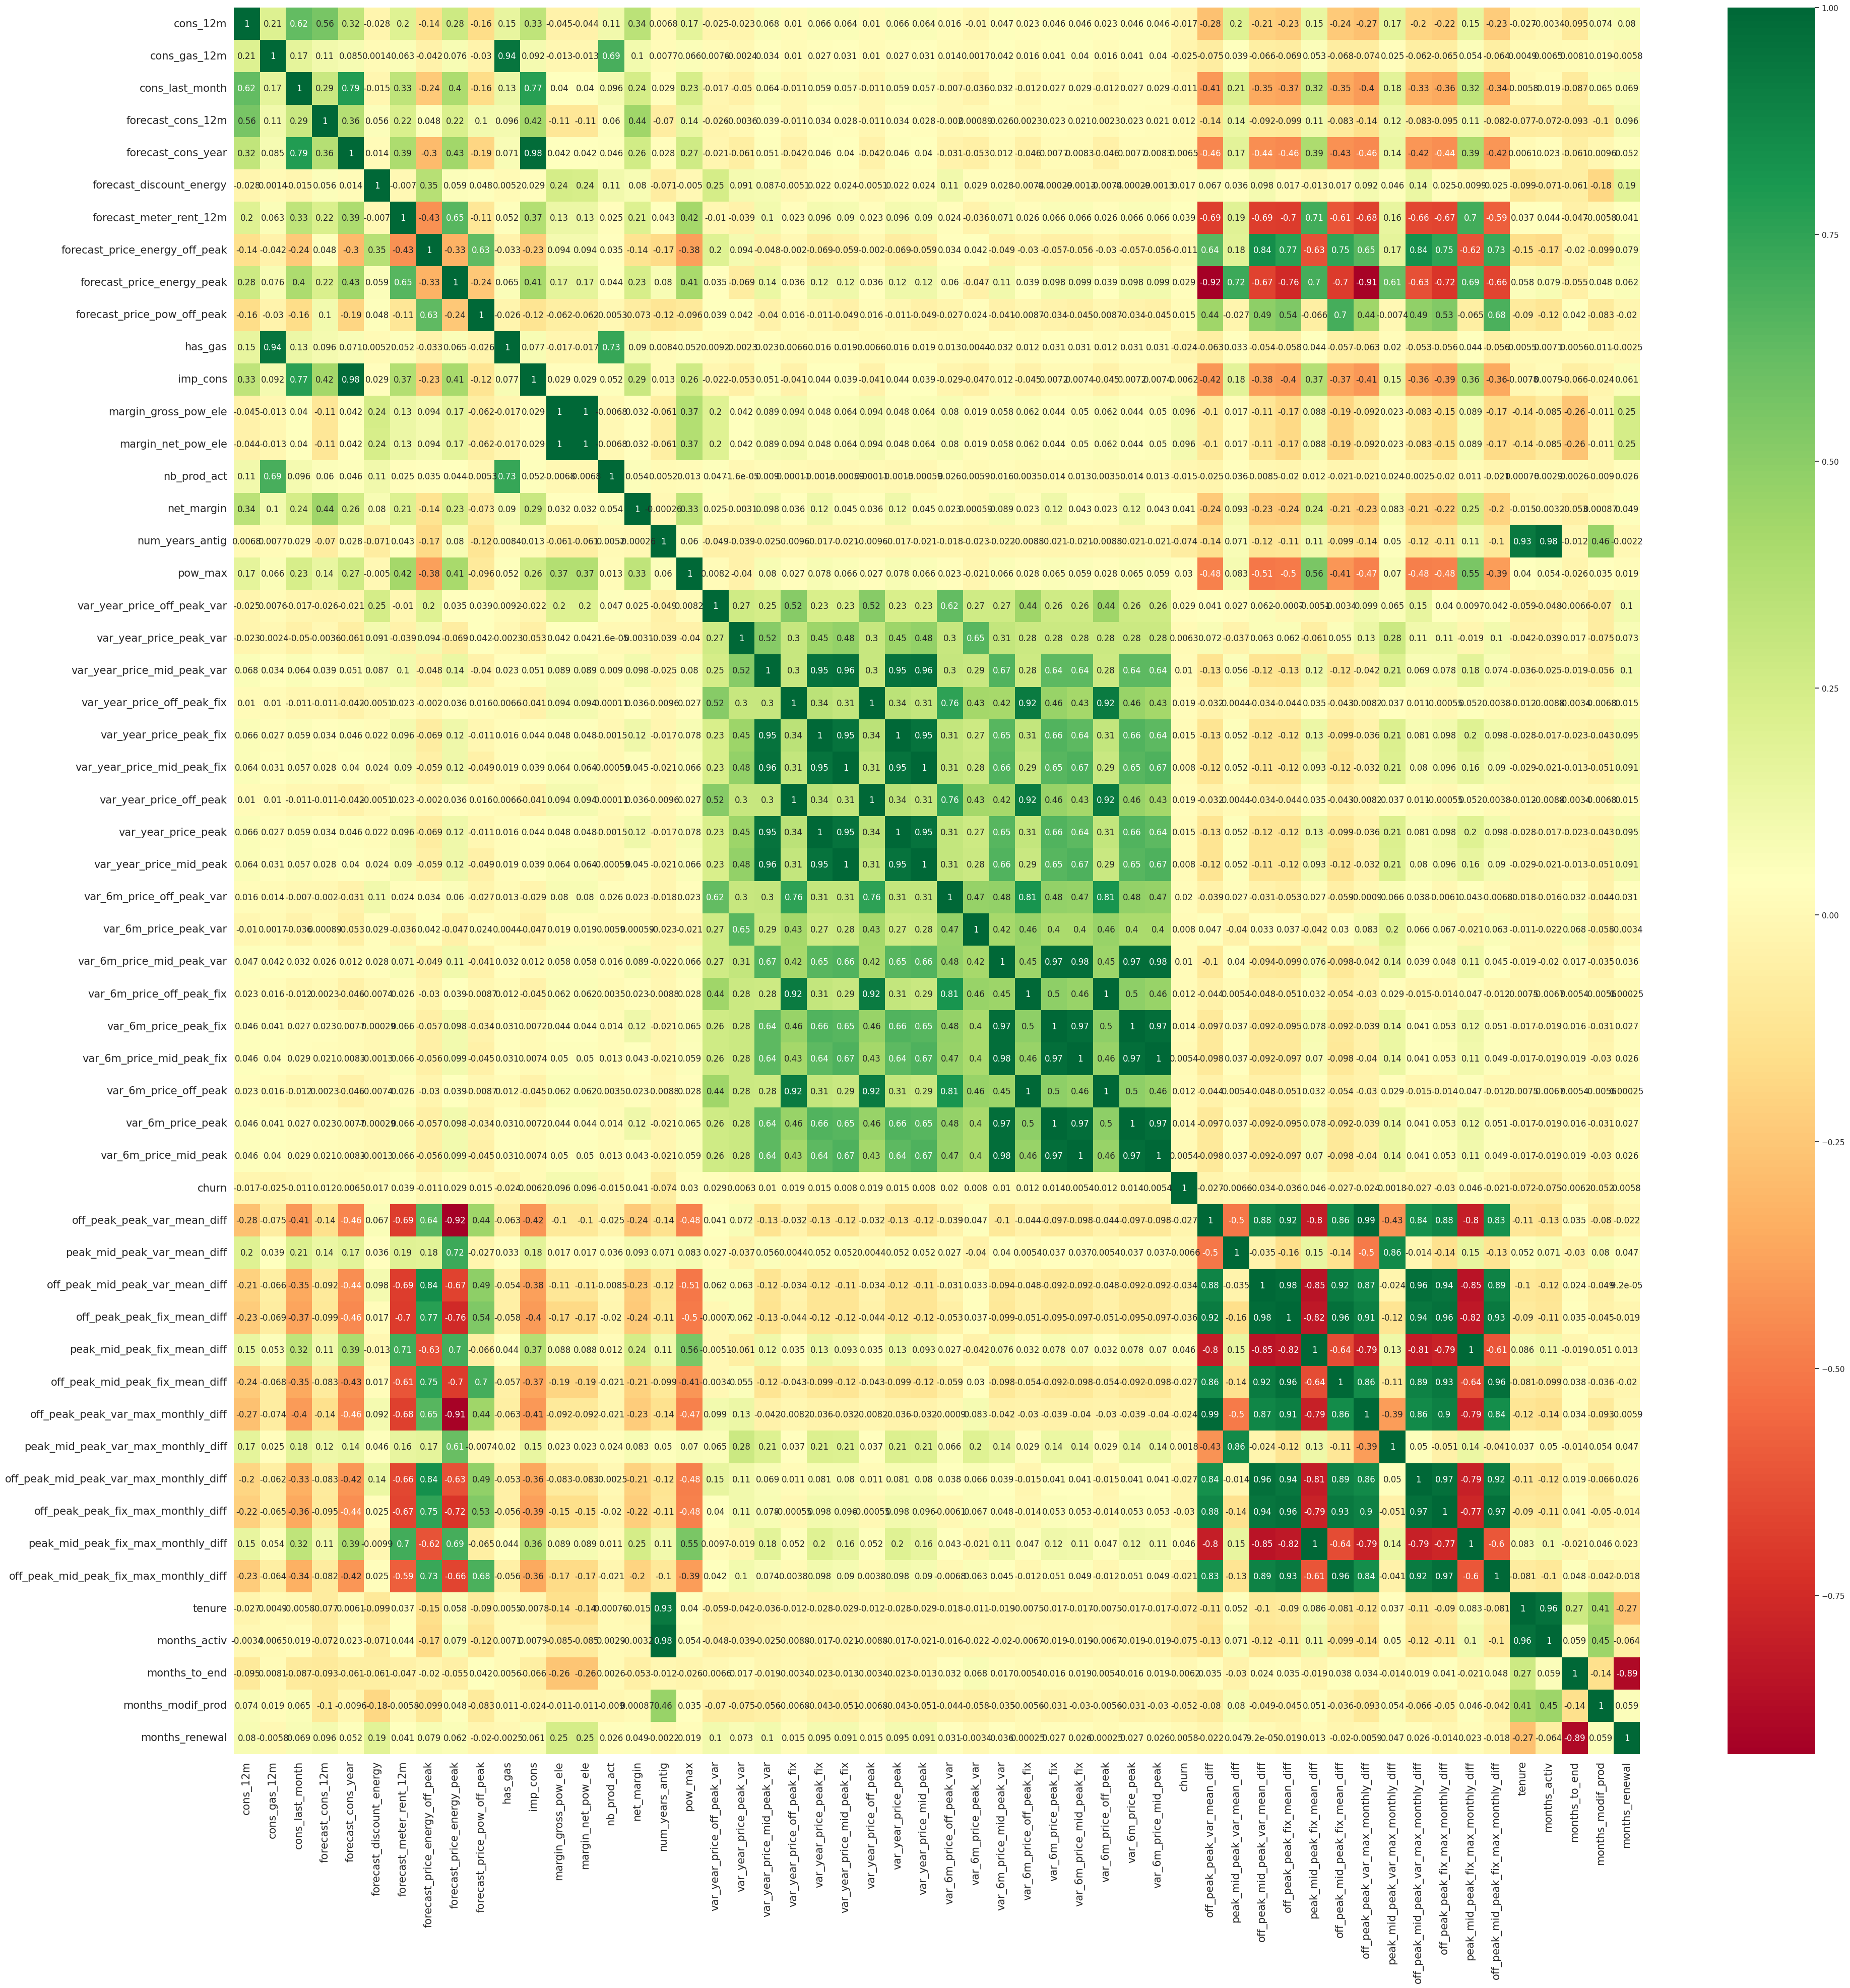

In [60]:


plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}, 
    cmap='RdYlGn'
)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.show()

In [61]:
eda_data = eda_data.drop(columns=['num_years_antig', 'forecast_cons_year'])
eda_data.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,False,False,True,False,False,False,False,True
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,77,4,True,False,False,False,False,True,False,False
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,69,8,False,False,True,False,False,True,False,False
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,70,9,False,False,False,True,False,True,False,False
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,72,9,True,False,False,False,False,True,False,False


Building Prediction Model using Random Forest Classifier

In [62]:

train_df = eda_data.copy()


X = eda_data.drop(columns=['id', 'churn'])
y = eda_data['churn']

In [63]:
X

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,1,...,2,6,False,False,True,False,False,False,False,True
1,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,0,...,77,4,True,False,False,False,False,True,False,False
2,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,0,...,69,8,False,False,True,False,False,True,False,False
3,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,0,...,70,9,False,False,False,True,False,True,False,False
4,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,0,...,72,9,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,4.508812,4.680707,0.000000,3.667360,0.0,1.291591,0.138305,0.000000,44.311378,1,...,7,19,False,False,True,False,False,False,False,True
14602,3.858778,0.000000,2.260071,2.801191,0.0,2.161458,0.100167,0.091892,58.995952,0,...,40,4,False,False,True,False,False,False,False,True
14603,3.265996,0.000000,2.255273,2.281919,0.0,2.115943,0.116900,0.100015,40.606701,0,...,47,10,False,False,True,False,False,False,False,True
14604,2.120574,0.000000,0.000000,1.308351,0.0,0.912753,0.145711,0.000000,44.311378,0,...,40,4,False,False,True,False,False,False,False,True


In [65]:
y

0        1
1        0
2        0
3        0
4        0
        ..
14601    0
14602    1
14603    1
14604    0
14605    0
Name: churn, Length: 14606, dtype: int64

In [66]:
print(X.shape)
print(y.shape)

(14606, 59)
(14606,)


In [67]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [68]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 59)
(10954,)
(3652, 59)
(3652,)


Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [70]:

y_pred = rf_classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report


In [72]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:- ", accuracy)
print("\n ----- Classification Report ----- \n")
print(classification_report(y_test, y_pred))

Accuracy score:-  0.9041621029572837

 ----- Classification Report ----- 

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.86      0.05      0.10       366

    accuracy                           0.90      3652
   macro avg       0.88      0.53      0.52      3652
weighted avg       0.90      0.90      0.86      3652



[[3283    3]
 [ 347   19]]


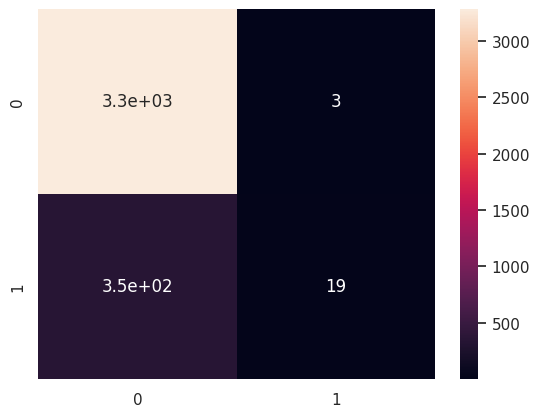

In [73]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True)
plt.show()

In [74]:
print("Precision Score is - ", precision_score(y_test, y_pred))

Precision Score is -  0.8636363636363636


In [75]:
print("Recall Score is - ", recall_score(y_test, y_pred))

Recall Score is -  0.05191256830601093


In [76]:
print("F1 Score is - ", f1_score(y_test, y_pred))

F1 Score is -  0.09793814432989689


In [77]:
auc = roc_auc_score(y_test, y_pred)
print("AUC score:- ", auc)

AUC score:-  0.5254998021079659


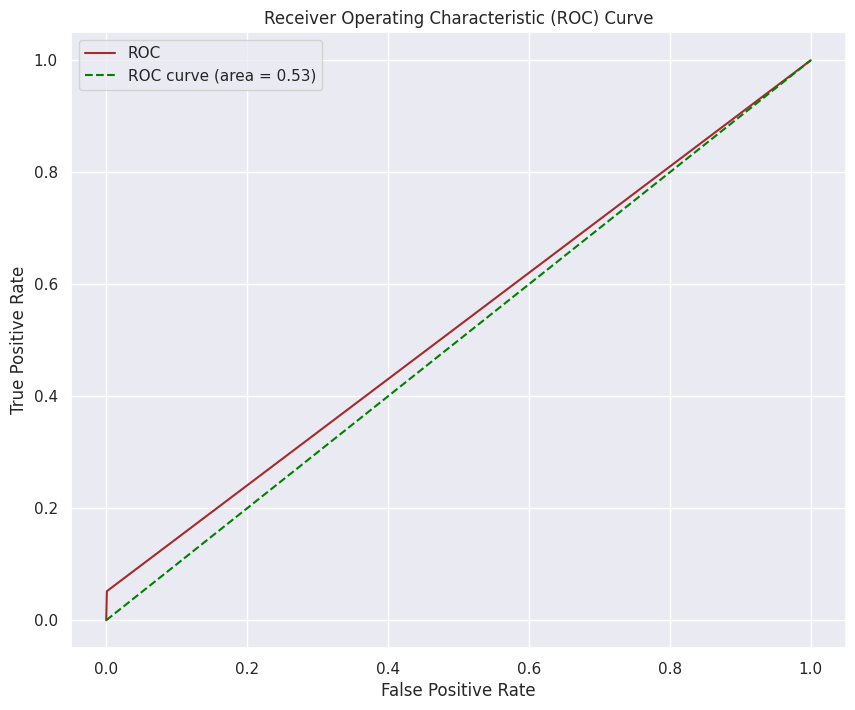

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='brown', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

K-Fold Cross Validation

In [79]:


from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(cv_scores))

Cross-validation scores:[0.90826107 0.90917389 0.90871748 0.90689183 0.91004566]


In [80]:


print('Average cross-validation score: {:.4f}'.format(cv_scores.mean()))

Average cross-validation score: 0.9086


In [81]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

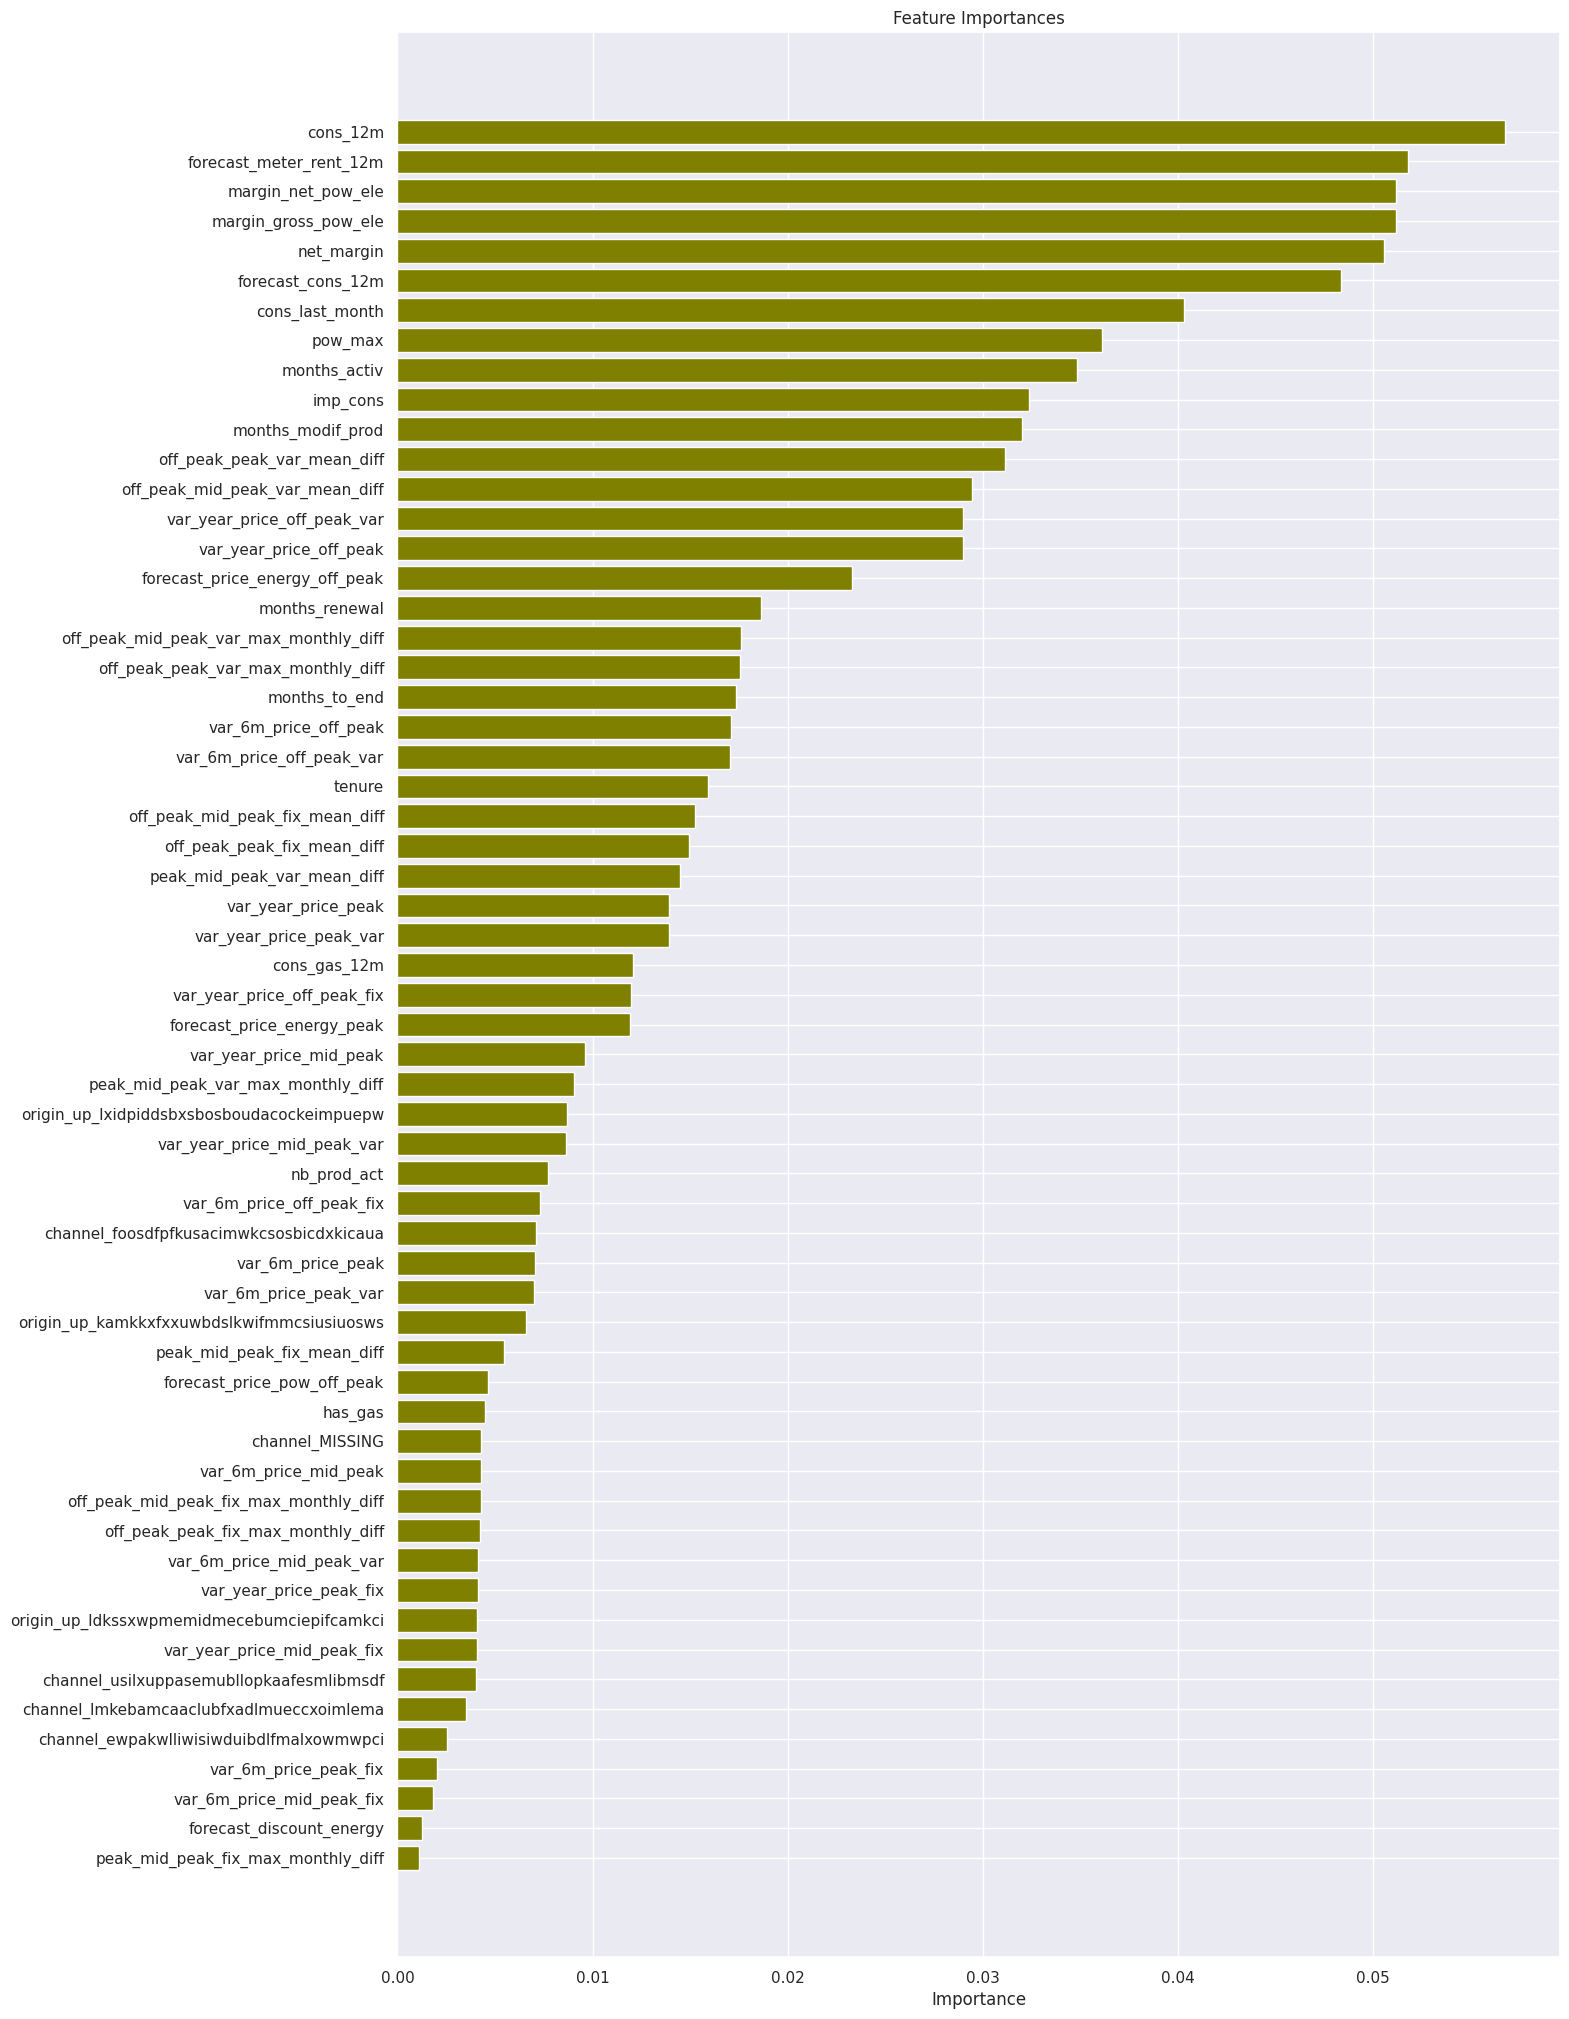

In [82]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='olive', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [83]:
proba_predictions = rf_classifier.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [84]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [85]:
X_test['churn'] = y_pred.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('predicted_data.csv')

Business impact of discount

In [86]:
test_data = pd.read_csv('predicted_data.csv')
test_data.drop(test_data.columns[0], axis=1, inplace=True)
test_data.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability
0,4.173390,4.193598,3.165541,3.168368,0.0,2.073828,0.114667,0.099548,40.606701,1,...,False,False,True,False,False,False,False,True,0,0.106
1,4.075036,0.000000,3.003461,3.305998,30.0,1.255031,0.198096,0.000000,46.305378,0,...,False,False,True,False,False,False,False,True,0,0.150
2,3.848435,0.000000,0.000000,2.756568,0.0,1.289366,0.141434,0.000000,44.311378,0,...,False,False,True,False,False,False,False,True,0,0.036
3,4.345433,0.000000,0.000000,3.516690,0.0,1.304921,0.142996,0.000000,44.311378,0,...,False,False,True,False,False,False,False,True,0,0.098
4,4.185655,0.000000,3.355834,3.208148,0.0,2.123067,0.120372,0.103487,40.606701,0,...,False,False,True,False,False,False,True,False,0,0.049


Calculating a baseline revenue estimate (no intervention)

In [87]:


test_data['basecase_revenue'] = (np.power(10, test_data['forecast_cons_12m']) + 1) * test_data['forecast_price_energy_off_peak'] + test_data['forecast_meter_rent_12m']


test_data['basecase_revenue_after_churn'] = test_data['basecase_revenue'] * (1 - 0.919 * test_data['churn'])

In [88]:
test_data.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability,basecase_revenue,basecase_revenue_after_churn
0,4.173390,4.193598,3.165541,3.168368,0.0,2.073828,0.114667,0.099548,40.606701,1,...,True,False,False,False,False,True,0,0.106,171.157200,171.157200
1,4.075036,0.000000,3.003461,3.305998,30.0,1.255031,0.198096,0.000000,46.305378,0,...,True,False,False,False,False,True,0,0.150,402.203316,402.203316
2,3.848435,0.000000,0.000000,2.756568,0.0,1.289366,0.141434,0.000000,44.311378,0,...,True,False,False,False,False,True,0,0.036,82.176885,82.176885
3,4.345433,0.000000,0.000000,3.516690,0.0,1.304921,0.142996,0.000000,44.311378,0,...,True,False,False,False,False,True,0,0.098,471.357082,471.357082
4,4.185655,0.000000,3.355834,3.208148,0.0,2.123067,0.120372,0.103487,40.606701,0,...,True,False,False,False,True,False,0,0.049,196.633386,196.633386


Calculate the estimated benefits and costs of intervention

In [89]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
 
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']

    pred.loc[pred['churn_probability'] >= cutoff, 'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)

    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

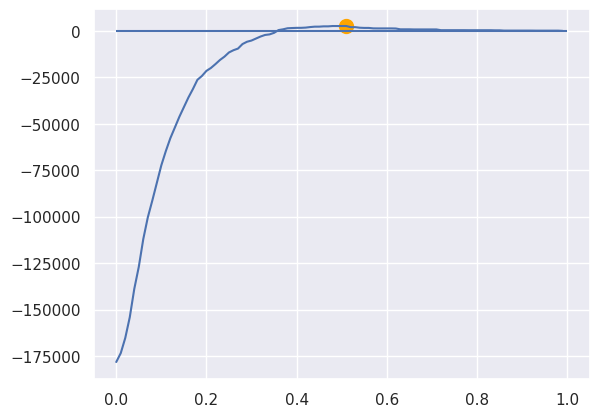

Maximum benefit at cutoff 0.51 with revenue delta of $2,631.88


In [90]:

rev_deltas = pd.Series({cutoff: get_rev_delta(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

def plot_tradeoff(rev_deltas: pd.Series):
    
    rev_deltas.plot()
    
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='orange')
    
    plt.hlines(0, 0, 1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)

Optional extra: how to select the cut-off?

In [91]:
def get_rev_delta_high_value(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2, min_rev: float=500):

    pred['discount_revenue'] = pred['basecase_revenue_after_churn']

    pred.loc[(pred['churn_probability'] >= cutoff) & (pred['basecase_revenue'] > min_rev),
    'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
 
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

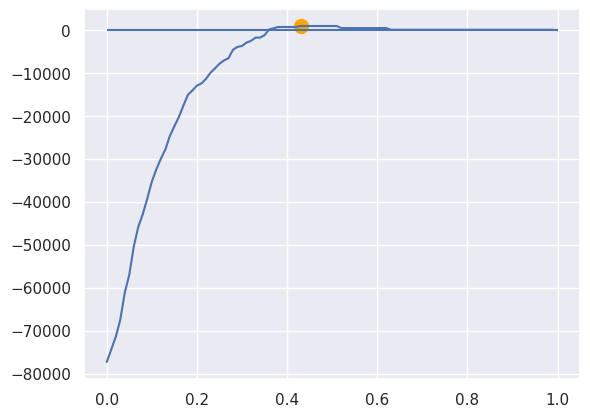

Maximum benefit at cutoff 0.43 with revenue delta of $874.63


In [92]:

rev_deltas_high_value = pd.Series({cutoff: get_rev_delta_high_value(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

plot_tradeoff(rev_deltas_high_value)

Optional extra: Using forecast rather than actual churn

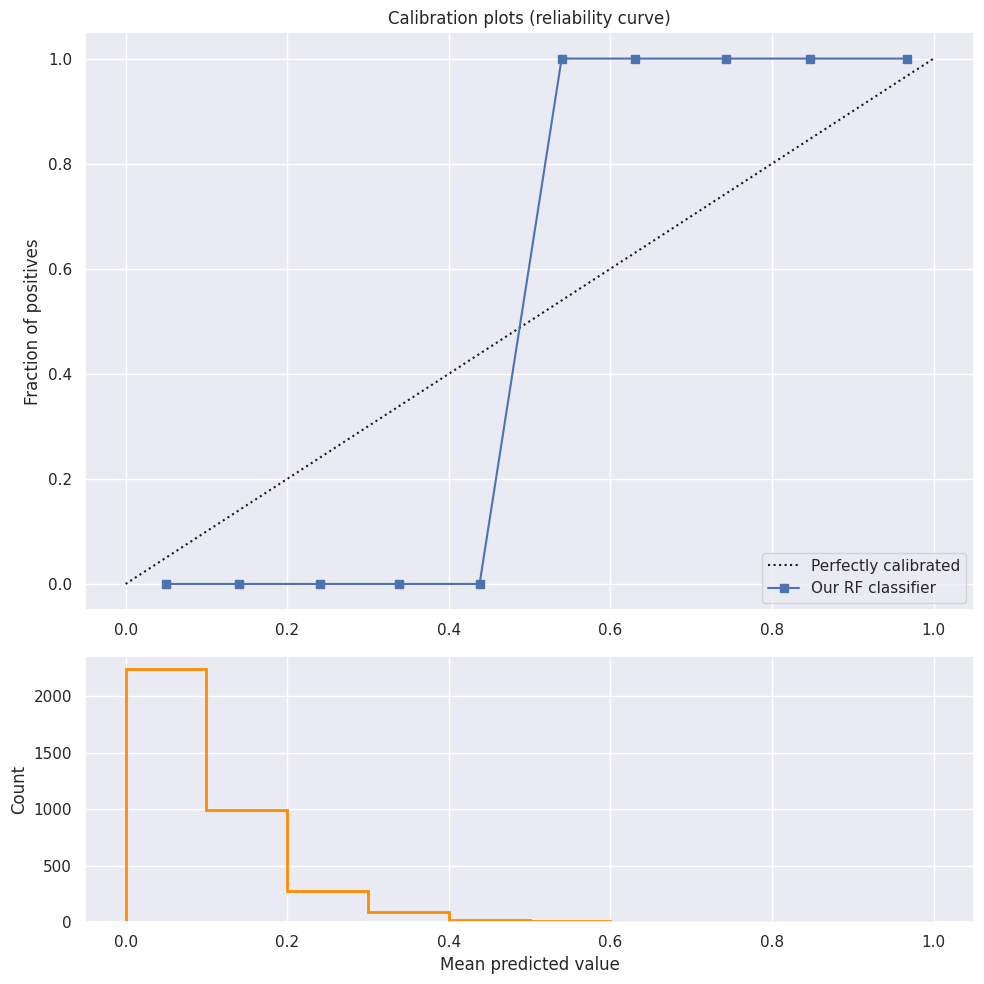

In [93]:


from sklearn.calibration import calibration_curve

fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_true=test_data['churn'],
    y_prob=test_data['churn_probability'],
    n_bins=10
)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="Our RF classifier")
ax2.hist(test_data['churn_probability'], range=(0, 1), bins=10, color='darkorange', histtype="step", lw=2)
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
plt.tight_layout()

In [94]:


test_data['basecase_revenue'] = np.power(10, test_data['forecast_cons_12m']) * test_data['forecast_price_energy_off_peak'] + test_data['forecast_meter_rent_12m']

test_data['basecase_revenue_after_churn'] = test_data['basecase_revenue'] * (1 - 0.919 * test_data['churn_probability'])

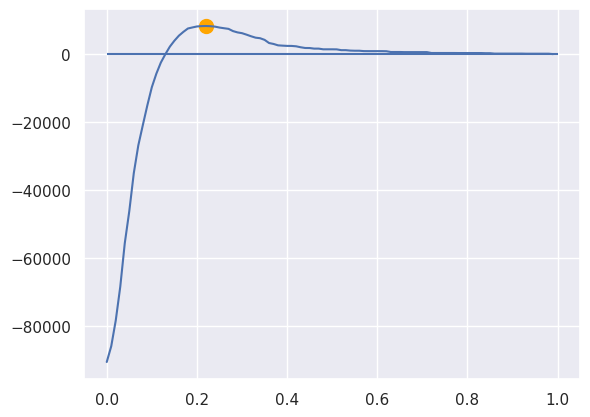

Maximum benefit at cutoff 0.22 with revenue delta of $8,276.40


In [95]:

rev_deltas = pd.Series({cutoff: get_rev_delta(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
plot_tradeoff(rev_deltas)